# Interpolação

Às vezes conhecemos o valor de uma função $f(x)$ em um conjunto de pontos $x_0, x_1, x_2, \ldots, x_{N-1}$, mas não temos uma expressão analítica que nos permita calcular $f(x)$ para um $x$ arbitrário. Os valores desta função podem ser provenientes de medidas experimentais, ou resultado de algum cálculo numérico pesado, por exemplo. Neste caso, precisamos de alguma técnica para estimar o valor da função $f(x)$ dado que conhecemos apenas $f(x_i)$. Uma destas técnicas é a chamada *interpolação*.

## Interpolação linear

Quando temos o valor de uma função em dois pontos $a$ e $b$, talvez a forma mais simples seja supôr que a função varia linearmente neste intervalo. Esta hipótese, bastante ingênua, pode ser suficiente em muitos casos, especialmente quando temos a liberdade de fazer a distância entre $a$ e $b$ tão pequena quanto necessário. Na maioria dos casos esta é uma aproximação, a função real é provavelmente uma curva entre estes dois pontos. Mas, supondo que a função seja aproximadamente linear neste intervalo, podemos calcular o seu valor facilmente apenas com geometria. Veja a figura abaixo.

Figura 5.14, Mark Newman.

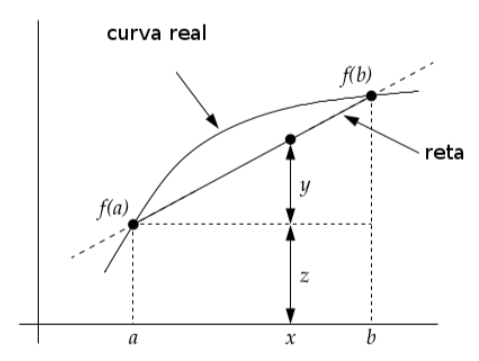

Conhecemos $a$, $b$, $f(a)$ e $f(b)$. Dado um valor para $x$, podemos aproximar o valor $f(x)$ de uma função linear $P(x)$, tal que

$$
f(x) \approx P(x) = f(a) + y.
$$

Usando semelhança de triângulos, podemos facilmente calcular $y$,

\begin{align}
\frac{y}{f(b) - f(a)} &= \frac{x - a}{b - a} \\
y &= \frac{x - a}{b - a} \left(f(b) - f(a)\right) \\
  &= \frac{f(b) - f(a)}{b - a} (x - a). \\
\end{align}

Assim, em termos das quantidades conhecidas, a aproximação fica

\begin{align}
f(x) \approx P(x) &= f(a) + \frac{f(b) - f(a)}{b - a} (x - a) \\
&= \frac{b - x}{b - a} f(a) + \frac{x - a}{b - a} f(b).
\end{align}

Esta é a fórmula fundamental da interpolação linear. Ela pode ser usada, inclusive, para *extrapolar* a função fora do intervalo $[a, b]$.

Podemos determinar quão precisa é esta aproximação fazendo a expansão de Taylor ao redor $x$, e calculando $f(a)$ e $f(b)$.

\begin{align}
f(a) = f(x) + (a - x) f^\prime(x) + \frac{1}{2} (a - x)^2 f^{\prime\prime}(x) + \ldots \\
f(b) = f(x) + (b - x) f^\prime(x) + \frac{1}{2} (b - x)^2 f^{\prime\prime}(x) + \ldots
\end{align}

Substituindo na fórmula da interpolação linear,

$$
\frac{b - x}{b - a} f(a) + \frac{x - a}{b - a} f(b) = \\
= \frac{b - x}{b - a} \left( f(x) + (a - x) f^\prime(x) + \frac{1}{2} (a - x)^2 f^{\prime\prime}(x) + \ldots \right) + \\
+ \frac{x - a}{b - a} \left( f(x) + (b - x) f^\prime(x) + \frac{1}{2} (b - x)^2 f^{\prime\prime}(x) + \ldots \right).
$$

É fácil ver que os termos em $f^\prime(x)$ se anulam (passe $b-x$ e $x-a$ para dentro dos parênteses). Agrupando em $f(x)$ e $f^{\prime\prime}(x)$,

$$
\frac{b - x}{b - a} f(a) + \frac{x - a}{b - a} f(b) = \\
= f(x) \frac{b - x + x - a}{b - a} + \frac{1}{2}  f^{\prime\prime}(x) \frac{(b - x)(a - x)^2 + (x - a)(b - x)^2}{b - a} + \ldots \\
= f(x) + \frac{1}{2}  f^{\prime\prime}(x) \frac{(b - x + x - a)(x - a)(b - x)}{b - a} + \ldots \\
= f(x) + \frac{1}{2} (x - a)(b - x) f^{\prime\prime}(x) + \ldots
$$

Isolando $f(x)$, temos

\begin{align}
f(x) = \frac{b - x}{b - a} f(a) + \frac{x - a}{b - a} f(b) - \frac{1}{2} (x - a)(b - x) f^{\prime\prime}(x) + \ldots \\
f(x) = P(x) - \frac{1}{2} (x - a)(b - x) f^{\prime\prime}(x) + \ldots
\end{align}

Veja que os dois primeiros termos são a aproximação linear. O termo em $f^{\prime\prime}(x)$ é a diferença entre o valor real da função e a aproximação linear, descartando termos de ordem maior. Esta diferença é o erro na estimativa da função, e vai a zero conforme $x$ se aproxima de $a$ ou $b$. Se a função é bem comportada, e o intervalo é pequeno, existe um local entre $a$ e $b$ onde o erro é o maior possível. Este local, geralmente, está muito próximo de do máximo (ou mínimo) de $f^{\prime\prime}(x)$.

O termo $(x - a)(b - x)$ tem o seu máximo na metade do intervalo, quando $x = (a + b)/2$. Na pior das hipóteses, o máximo de $f^{\prime\prime}(x)$ ocorre neste exato ponto, logo o erro absoluto está limitado em

\begin{align}
\epsilon &< \frac{1}{2} \left(\frac{a + b}{2} - a\right) \left(b - \frac{a+b}{2}\right) \max_{a < x < b} \left| f^{\prime\prime}(x) \right| \\
\epsilon &< \frac{1}{8} (b - a)^2 \max_{a < x < b} \left| f^{\prime\prime}(x) \right|.
\end{align}

### Exercício 1

Seja a função $f(x) = \ln x$, calculada em $a=2$ e $b=5$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [20]:
# Valores dados
a = 2.0
b = 5.0
fa = np.log(a)
fb = np.log(b)

In [21]:
fa, fb

(0.6931471805599453, 1.6094379124341003)

**a.** Calcule a interpolação dos valores de $f(x)$ neste intervalo.

In [22]:
def P(x):
    return ((b-x)/(b-a))*fa + ((x-a)/(b-a))*fb

**b.** Faça o gráfico da função $f(x)$ e da sua interpolação. Use `ax.plot(x, y, marker='o')` para desenhar apenas bolinhas.

Text(0, 0.5, '$y$')

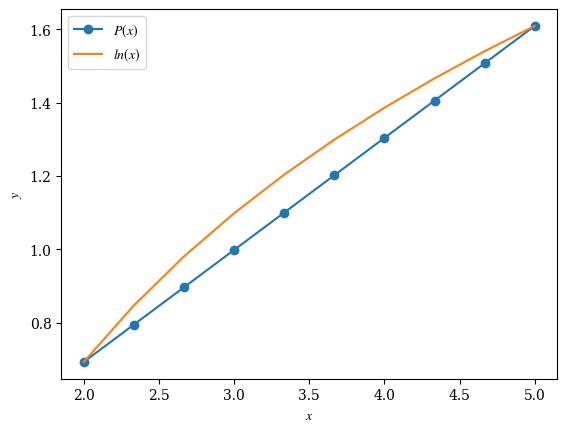

In [27]:
fig, ax = plt.subplots(1,1)

x = np.linspace(2,5,10)

ax.plot(x,P(x), marker = "o", label = "$P(x)$")
ax.plot(x,np.log(x), label = "$ln(x)$")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

## Interpolação linear segmentada

Agora que já sabemos como fazer uma interpolação linear de uma função entre dois pontos, é fácil estender este princípio para uma amostragem de muitos pontos. Suponha que tenhamos um conjunto de $N$ pontos $x_i$, onde conhecemos o valor de uma função $f(x_i)$. Vamos supor ainda que os $x_i$ estão ordenados, isto é, $x_i < x_{i+1}$. Também, não existem $x_i$ repetidos. Isto vai simplificar tanto a descrição do método como o código do programa resultante. A ordenação de listas é um tópico bastante amplo, não vamos nos enveredar por esta senda. Existe uma função para ordenar arrays em Python, veja [numpy.sort()](https://numpy.org/doc/stable/reference/generated/numpy.sort.html), usada também num exemplo abaixo. Note que este processo só precisa ser feito uma vez, antes da interpolação.

Estando ordenados, os $x_i$ delimitam $N-1$ segmentos ou intervalos $[x_i, x_{i+1}]$, onde não há sobreposição de intervalos. Para poder aplicar o método da interpolação linear, isto é, calcular o valor de $f(x)$ dado um valor de $x$ arbitrário, primeiro precisamos descobrir em qual intervalo $x$ está. Encontrado o intervalo, basta aplicar a fórmula da interpolação linear,

$$
f(x) \approx P_i(x) = \frac{x_{i+1} - x}{x_{i+1} - x_{i}} f(x_{i}) + \frac{x - x_{i}}{x_{i+1} - x_{i}} f(x_{i+1}).
$$

Dizemos então que a função $P(x)$ é uma função linear por partes, que interpola a função $f(x)$ nos intervalos $[x_i, x_{i+1}]$,

$$
P(x) = P_i(x), x \in [x_i, x_{i+1}].
$$

A parte mais crítica talvez seja, para um dado $x$, encontrar qual o intervalo vamos usar para a interpolação. De forma ingênua, ficamos tentados a verificar nos $N-1$ intervalos se $x_i < x < x_{i+1}$. Isto é extremamente ineficiente, existem forma mais inteligentes de fazer a busca. Nós até mesmo já fizemos algo parecido quando procuramos a raiz de uma função, usando o método da bisseção. O método que vamos usar chama-se *busca binária*.

O procedimento é simples: vamos dividindo o conjunto de $N$ pontos ao meio, e verificando em que lado está $x$. Repetimos isto até que se encontre o menor intervalo que contém $x$. Lembre-se de que isso só funciona se os $x_i$ estão em ordem crescente. O algoritmo em detalhes é esse:

- Defina $L=0$ e $R=N-1$, os índices do intervalo atual, começando com o intervalo inteiro de $x_i$.
- Enquanto $L < R$,
  - Defina $m = \text{floor}\left( \frac{L+R}{2} \right)$, o maior inteiro menor que o valor no meio de $L$ e $R$.
  - Se $x_m > x$, $R = m$.
  - Se não (isto é, $x_m \leq x$), $L = m + 1$.
- Agora $L = R$, a busca terminou.
- $R$ (ou $L$) contém o valor do índice à direita.

Semelhante ao método da bisseção, este algorimo leva $\log_2 N$ passos para encontrar o intervalo. Vamos definir uma função Python que retorne o índice à esquerda dos limites do intervalo que contém $x$.

In [1]:
def busca_binaria(agulha, palheiro):
    '''
    Busca uma agulha num palheiro, isto é,
    o intervalo de valores em palheiro
    que cercam o valor da agulha dado.
    Retorna o índice do limite à esquerda.
    Admite que palheiro está ordenado.
    '''
    N = len(palheiro)
    L = 0
    R = N-1
    
    while L < R:
        m = int((L+R)/2)

        if palheiro[m] > agulha:
            R = m

        else:   
            L = m + 1

    assert L == R
    
    return R - 1 # Queremos o índice à esquerda.

In [7]:
print(busca_binaria(3.8,[1,2,3,4,5]))

2


Em geral, temos $x_i$ e $f(x_i)$ em arrays ou tabelas. No exemplo abaixo, temos 5 amostragens da função $f(x) = x^2$. Vamos encontrar os intervalos de interpolação para alguns pontos.

In [46]:
# Amostragens da função a ser interpolada.
# Poderia ser uma tabela lida de um arquivo.
xx = np.linspace(0.0, 1.0, 4)
ff = xx**2

In [50]:
# Posições onde queremos calcular a interpolação.
N = 9
xx_interp = np.linspace(0.0, 1.1, N)

for j in range(N):
    x = xx_interp[j]
    j = busca_binaria(x, xx)
    a = xx[j]
    b = xx[j + 1]
    fa = ff[j]
    fb = ff[j + 1]
    print(f'x={x:.3f} está no intervalo [{a:.3f}, {b:.3f}], com f(a) = {fa:.3f}, f(b) = {fb:.3f}')

x=0.000 está no intervalo [0.000, 0.333], com f(a) = 0.000, f(b) = 0.111
x=0.138 está no intervalo [0.000, 0.333], com f(a) = 0.000, f(b) = 0.111
x=0.275 está no intervalo [0.000, 0.333], com f(a) = 0.000, f(b) = 0.111
x=0.413 está no intervalo [0.333, 0.667], com f(a) = 0.111, f(b) = 0.444
x=0.550 está no intervalo [0.333, 0.667], com f(a) = 0.111, f(b) = 0.444
x=0.688 está no intervalo [0.667, 1.000], com f(a) = 0.444, f(b) = 1.000
x=0.825 está no intervalo [0.667, 1.000], com f(a) = 0.444, f(b) = 1.000
x=0.963 está no intervalo [0.667, 1.000], com f(a) = 0.444, f(b) = 1.000
x=1.100 está no intervalo [0.667, 1.000], com f(a) = 0.444, f(b) = 1.000


Vamos juntar tudo isso para finalmente calcular a interpolação linear segmentada de uma função amostrada qualquer.

### Exercício 2

A tabela abaixo contém a capacidade térmica isobárica da água $C_P$, em unidades de $\mathrm{[kJ\,/\,kg\,K]}$, com a temperatura $T$ em graus centígrados.

In [11]:
# Tabela: temperatura, Cp
# Engineering ToolBox, (2004). Water - Specific Heat . [online]
# Available at: https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html
dados = np.array([(100.0, 4.2157),
                  (110.0, 4.2283),
                  (120.0, 4.2435),
                  (140.0, 4.2826),
                  (160.0, 4.3354),
                  (180.0, 4.4050),
                  (200.0, 4.4958),
                  (220.0, 4.6146),
                  (240.0, 4.7719),
                  (260.0, 4.9856),
                  (280.0, 5.2889),
                  (300.0, 5.7504),
                  (320.0, 6.5373),
                  (340.0, 8.2080),
                  (360.0, 15.004)],
                 dtype=[('T', 'float64'), ('Cp', 'float64')])

# Dados originais.
# Extraindo as colunas da tabela.
# T_dados e Cp_dados são arrays comuns.
T_dados = dados['T']
Cp_dados = dados['Cp']

In [60]:
len(T_dados)

15

**a.** Defina as temperaturas que queremos calcular. Lembre-se de que não sabemos extrapolar, logo os pontos devem estar dentro dos limites da tabela. Faça a amostragem de $1$ em $1$ grau.

In [75]:
T = np.arange(100,361,1)

N = len(T)
Cp_list = np.zeros(len(T))

for k in range(N):

    t = T[k]
    ind = busca_binaria(t,T_dados)
    Ta = T_dados[ind]
    Tb = T_dados[ind+1]
    CPa = Cp_dados[ind]
    Cpb = Cp_dados[ind+1]

    Cp_list[k] = (Tb-t)/(Tb-Ta)*CPa + (t-Ta)/(Tb-Ta)*Cpb

**b.** Faça a interpolação linear da tabela nos pontos definidos acima, e guarde o resultado numa lista ou array.

**c.** Faça o gráfico dos valores interpolados e dos dados. Certifique-se de que os valores interpolados coincidem com os dados à mesma temperatura.

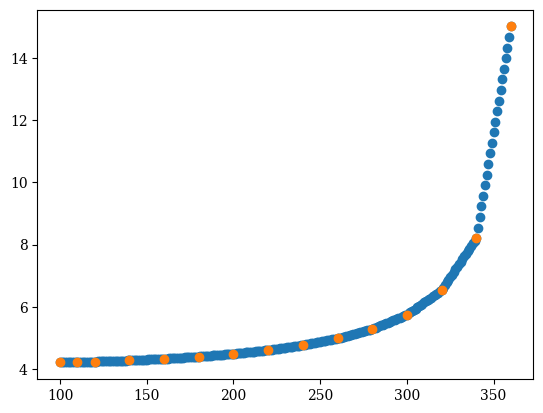

In [84]:
fig, ax = plt.subplots(1,1)

ax.scatter(T,Cp_list)
ax.scatter(T_dados,Cp_dados, marker = "o")

## Interpolação linear com `numpy`

Existe muito espaço nesta nossa implementação para otimizações. Veja que fazemos a busca binária muitas vezes, embora as temperaturas sejam quase as mesmas em buscas seguidas. O próprio cálculo da interpolação pode ser otimizado. E tudo isso pode ser feito usando uma linguagem compilada.

Assim, tome a nossa implementação apenas como referência. É importante saber como realizar uma interpolação, mas, na vida real, tente sempre usar bibliotecas numéricas para problemas já resolvidos. No caso da interpolação linear, existe a função [np.interp()](https://numpy.org/doc/stable/reference/generated/numpy.interp.html). Abaixo, refazemos a interpolação com os dois métodos. Não desdenhe seu código, você sabe exatamente como ele funciona, e o resultado das duas versões é indistinguível!

In [9]:
import numpy as np

In [12]:
# De 100 até 360 graus centígrados, de 1 em 1 grau.
dT = 1.0
T_interp = np.arange(100.0, 360.0 + dT, dT)

# Dados originais.
# Extraindo as colunas da tabela.
# T_dados e Cp_dados são arrays comuns.
T_dados = dados['T']
Cp_dados = dados['Cp']

# Esta função faz tudo o que estudamos até aqui.
Cp_interp = np.interp(T_interp, T_dados, Cp_dados)

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

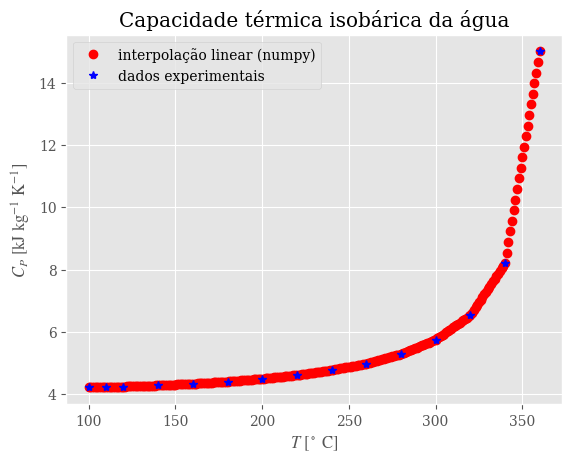

In [14]:
fig, ax = plt.subplots()
ax.plot(T_interp, Cp_interp, 'ro', label='interpolação linear (numpy)')
ax.plot(T_dados, Cp_dados, 'b*', label='dados experimentais')

ax.set_title('Capacidade térmica isobárica da água')
ax.set_xlabel(r'$T\ [^\circ\ \mathrm{C}]$')
ax.set_ylabel(r'$C_P\ [\mathrm{kJ}\ \mathrm{kg}^{-1}\ \mathrm{K}^{-1}]$')
ax.legend()
plt.show()

## *Spline* cúbica
           
Usamos uma reta para fazer a interpolação, mas podemos usar polinômios de graus maiores para interpolar os valores da função. Com esses polinômios temos a opção de fazer a interpolação ser suave, isto é, ter a primeira derivada contínua. A interpolação polinomial suave mais usada é a *spline* *cúbica*, ou *cspline*. Neste caso, a segunda derivada é linear por partes. A dedução das fórmulas da cspline é bem mais trabalhosa do que a interpolação linear, ficando como exercício acompanhá-la na [seção 6.6 do livro Cálculo Numérico](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/i1-interpolacao_cubica_segmentada_-_spline.html) do REAMAT/UFGRS. Se quiser uma explicação mais visual, assista o vídeo [The continuity of splines](https://www.youtube.com/watch?v=jvPPXbo87ds) da Freya Holmér.

Vamos pular a dedução matemática e usar o pacote [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#d-interpolation-interp1d) para fazer a interpolação com cspline. Este modo de fazer a interpolação é mais genérico e versátil do que o método visto acima com `np.interp()`. Vejamos novamente o exemplo da capacidade térmica.

In [16]:
from scipy.interpolate import interp1d

# Passamos os dados de entrada, e criamos uma
# função interpoladora. Veja a documentação
# para saber quais tipos (kind) e opções estão disponíveis.
Cp_func = interp1d(T_dados, Cp_dados, kind='cubic')

# Lembre que T_interp é o nosso array de
# temperaturas para calcular a capacidade térmica.
# O resultado em Cp_interp_cspline é um array das mesmas dimensões de T_interp.
Cp_interp_cspline = Cp_func(T_interp)

Vamos repetir o gráfico, focando na região onde os dados variam mais, e notar a diferença entre a interpolação linear e a cspline.

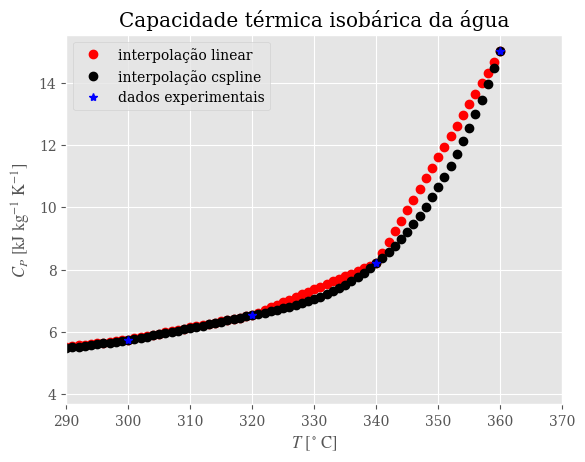

In [17]:
fig, ax = plt.subplots()
ax.plot(T_interp, Cp_interp, 'ro', label='interpolação linear')
ax.plot(T_interp, Cp_interp_cspline, 'ko', label='interpolação cspline')
ax.plot(T_dados, Cp_dados, 'b*', label='dados experimentais')

ax.set_title('Capacidade térmica isobárica da água')
ax.set_xlabel(r'$T\ [^\circ\,\mathrm{C}]$')
ax.set_ylabel(r'$C_P\ [\mathrm{kJ}\ \mathrm{kg}^{-1}\ \mathrm{K}^{-1}]$')
ax.set_xlim(290, 370)
ax.legend()
plt.show()

## Conclusão

O uso da interpolação cspline pressupõe que a função interpolada varia suavemente. Algumas situações, como funções descontínuas, ou dados experimentais ruidosos podem causar artefatos na interpolação. Por outro lado, a interpolação linear pressupõe menos hipóteses, e é muito fácil de implementar em qualquer situação.

Como na maioria dos métodos numéricos, é preciso sempre avaliar a validade das aproximações e dos modelos.